<a href="https://colab.research.google.com/github/leilaamani/DataScience/blob/main/SOH_Estimation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config Completer.use_jedi = False

In [2]:
%matplotlib inline
!pip show tensorflow
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d NASA-metadata

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
[naza.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of naza.zip or
        naza.zip.zip, and cannot find naza.zip.ZIP, period.


In [4]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Reading main file of NASA metadata

In [20]:
    b_df= pd.read_csv('NASA-metadata.csv')
    b_df.head(2)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.674304745,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.056057833,0.200970166


In [3]:
import sys
sys.setrecursionlimit(12000)
def load_data(battery_id):
   b_df= load_data('NASA-metadata' + battery_id + '.csv')
   b_df.head(2)
   
load_data('B0047')

RecursionError: ignored

In [ ]:
B0047_df=pd.read_csv('NASA-00001.csv' )
print('Total data in dataset: ', len(B0047_df))
B0047_df

# Read B0047 cell 

In [6]:
B0047_metadata_df=pd.read_csv('NASA-metadata.csv' )
B0047_metadata_df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.674304745,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.056057833,0.200970166
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.053191859,0.164733999
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.524366211,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.096808798,0.154897382
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.020138,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.990759166,NaN,NaN


In [7]:
print (B0047_metadata_df.battery_id.unique())
print (B0047_metadata_df.battery_id.nunique())

['B0047' 'B0045' 'B0048' 'B0046' 'B0043' 'B0032' 'B0039' 'B0040' 'B0029'
 'B0028' 'B0042' 'B0034' 'B0038' 'B0033' 'B0030' 'B0041' 'B0027' 'B0044'
 'B0036' 'B0025' 'B0026' 'B0031' 'B0049' 'B0050' 'B0052' 'B0051' 'B0006'
 'B0005' 'B0007' 'B0018' 'B0053' 'B0054' 'B0056' 'B0055']
34


In [8]:
B0047_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


##### Rows are extracted by just capacity values

In [9]:
discharge_capacity=B0047_metadata_df.dropna(subset=['Capacity'])
discharge_capacity

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.674304745,NaN,NaN
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.524366211,NaN,NaN
6,discharge,[2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...,4,B0047,6,7,00007.csv,1.508076297,NaN,NaN
8,discharge,[2010. 7. 22. 6. 16. ...,4,B0047,8,9,00009.csv,1.483557796,NaN,NaN
10,discharge,[2010. 7. 22. 10. 51. ...,4,B0047,10,11,00011.csv,1.467139167,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7553,discharge,[2010. 9. 29. 19. 50. ...,4,B0055,240,7554,07554.csv,1.028526968,NaN,NaN
7555,discharge,[2.01e+03 9.00e+00 2.90e+01 2.30e+01 3.30e+01 ...,4,B0055,242,7556,07556.csv,0.981684436,NaN,NaN
7557,discharge,[2010. 9. 30. 3. 15. ...,4,B0055,244,7558,07558.csv,1.012712143,NaN,NaN
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.020138,NaN,NaN


##### Adding 'Cycle' column to main data frame

In [10]:
discharge_capacity.max()

type                                                     discharge
start_time             [2010.     8.     4.    20.    41.    59.5]
ambient_temperature                                             44
battery_id                                                   B0056
test_id                                                        613
uid                                                           7564
filename                                                 07564.csv
Capacity                                                        []
Re                                                            None
Rct                                                           None
dtype: object

In [12]:
cycle=[]
for i in range(len(discharge_capacity)):
    cycle.append(i+1)
discharge_capacity['cycle']=cycle
discharge_capacity

<ipython-input-12-26120a9f9276>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharge_capacity['cycle']=cycle


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,cycle
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.674304745,NaN,NaN,1
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.524366211,NaN,NaN,2
6,discharge,[2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...,4,B0047,6,7,00007.csv,1.508076297,NaN,NaN,3
8,discharge,[2010. 7. 22. 6. 16. ...,4,B0047,8,9,00009.csv,1.483557796,NaN,NaN,4
10,discharge,[2010. 7. 22. 10. 51. ...,4,B0047,10,11,00011.csv,1.467139167,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
7553,discharge,[2010. 9. 29. 19. 50. ...,4,B0055,240,7554,07554.csv,1.028526968,NaN,NaN,2790
7555,discharge,[2.01e+03 9.00e+00 2.90e+01 2.30e+01 3.30e+01 ...,4,B0055,242,7556,07556.csv,0.981684436,NaN,NaN,2791
7557,discharge,[2010. 9. 30. 3. 15. ...,4,B0055,244,7558,07558.csv,1.012712143,NaN,NaN,2792
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.020138,NaN,NaN,2793


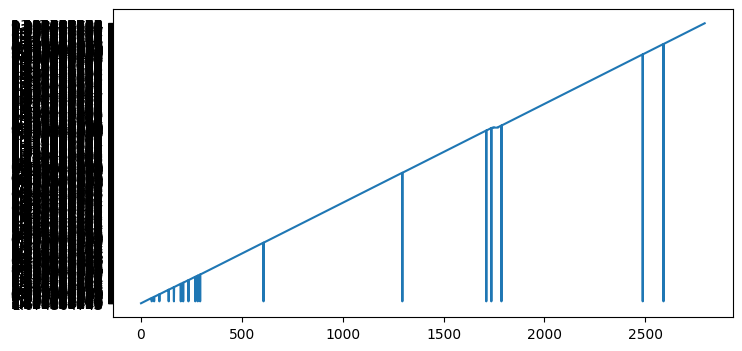

In [13]:
plt.figure(figsize=(8,4))
plt.plot(discharge_capacity.cycle,discharge_capacity.Capacity)


Text(0.5, 1.0, 'Discharge B0047')

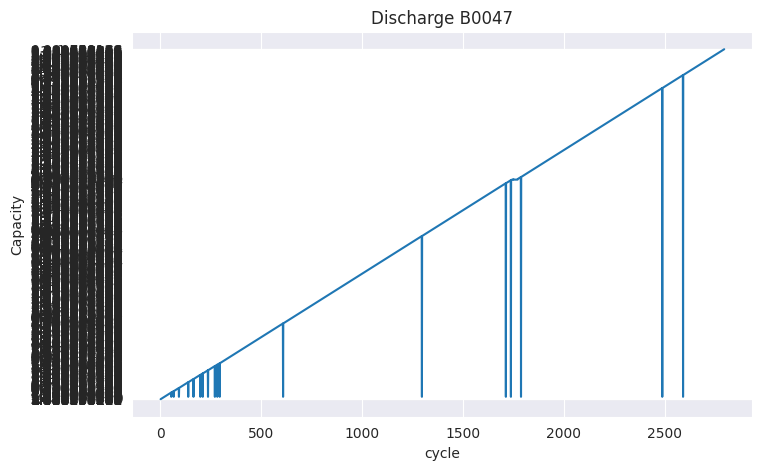

In [14]:
# plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
plt.plot(discharge_capacity['cycle'], discharge_capacity['Capacity'])
#Draw threshold
# plt.plot([0.,len(Capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0047')

In [15]:
#     print('Total data in dataset: ', len(mat[battery_id][0, 0]['cycle'][0]))
#   counter = 0
#   dataset = []
#   capacity_data = []
  
#   for i in range(len(mat[battery_id][0, 0]['cycle'][0])):
#     row = mat[battery_id][0, 0]['cycle'][0, i]
#     if row['type'][0] == 'discharge':
#       ambient_temperature = row['ambient_temperature'][0][0]
#       date_time = datetime.datetime(int(row['time'][0][0]),
#                                int(row['time'][0][1]),
#                                int(row['time'][0][2]),
#                                int(row['time'][0][3]),
#                                int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
#       data = row['data']
#       capacity = data[0][0]['Capacity'][0][0]
#       for j in range(len(data[0][0]['Voltage_measured'][0])):
#         voltage_measured = data[0][0]['Voltage_measured'][0][j]
#         current_measured = data[0][0]['Current_measured'][0][j]
#         temperature_measured = data[0][0]['Temperature_measured'][0][j]
#         current_load = data[0][0]['Current_load'][0][j]
#         voltage_load = data[0][0]['Voltage_load'][0][j]
#         time = data[0][0]['Time'][0][j]
#         dataset.append([counter + 1, ambient_temperature, date_time, capacity,
#                         voltage_measured, current_measured,
#                         temperature_measured, current_load,
#                         voltage_load, time])
#       capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
#       counter = counter + 1
#   print(dataset[0])
#   return [pd.DataFrame(data=dataset,
#                        columns=['cycle', 'ambient_temperature', 'datetime',
#                                 'capacity', 'voltage_measured',
#                                 'current_measured', 'temperature_measured',
#                                 'current_load', 'voltage_load', 'time']),
#           pd.DataFrame(data=capacity_data,
#                        columns=['cycle', 'ambient_temperature', 'datetime',
#                                 'capacity'])]
# dataset, capacity = load_data('B0047')
# pd.set_option('display.max_columns', 10)
# print(dataset.head())
# dataset.describe()